In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pylab as plt

In [34]:
df = pd.read_csv('house.csv', index_col=0)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [35]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

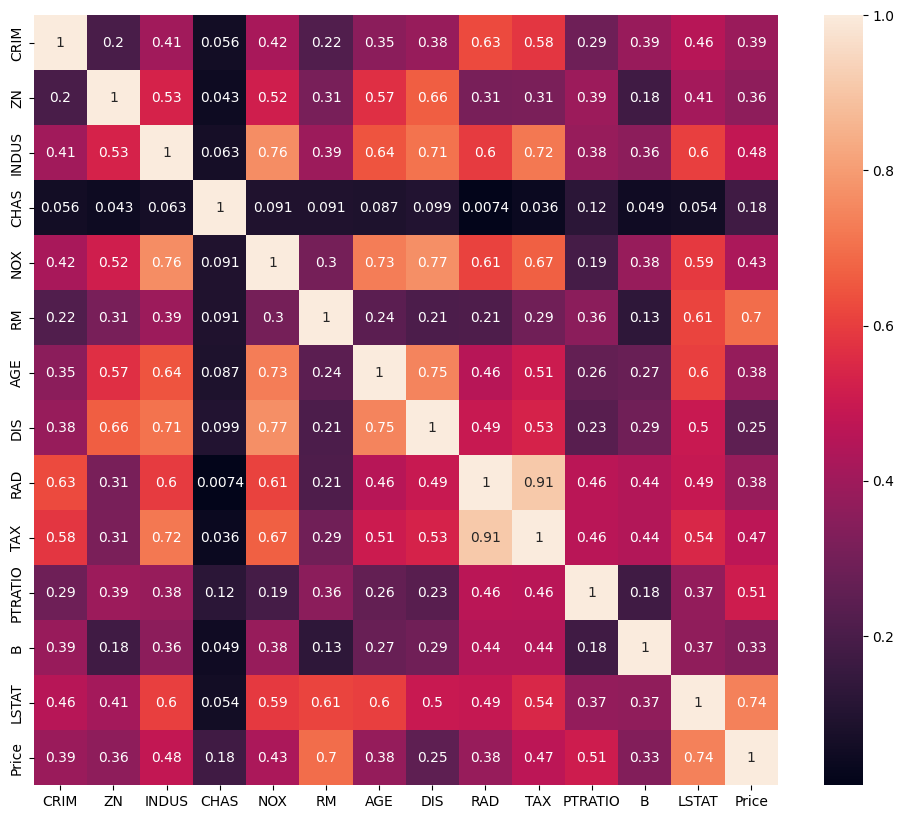

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(corr.abs(), annot=True)

<Axes: xlabel='LSTAT', ylabel='Price'>

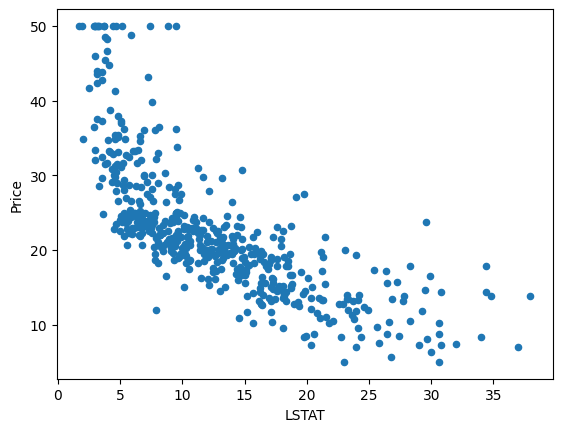

In [37]:
df.plot(kind='scatter',x='LSTAT',y='Price')

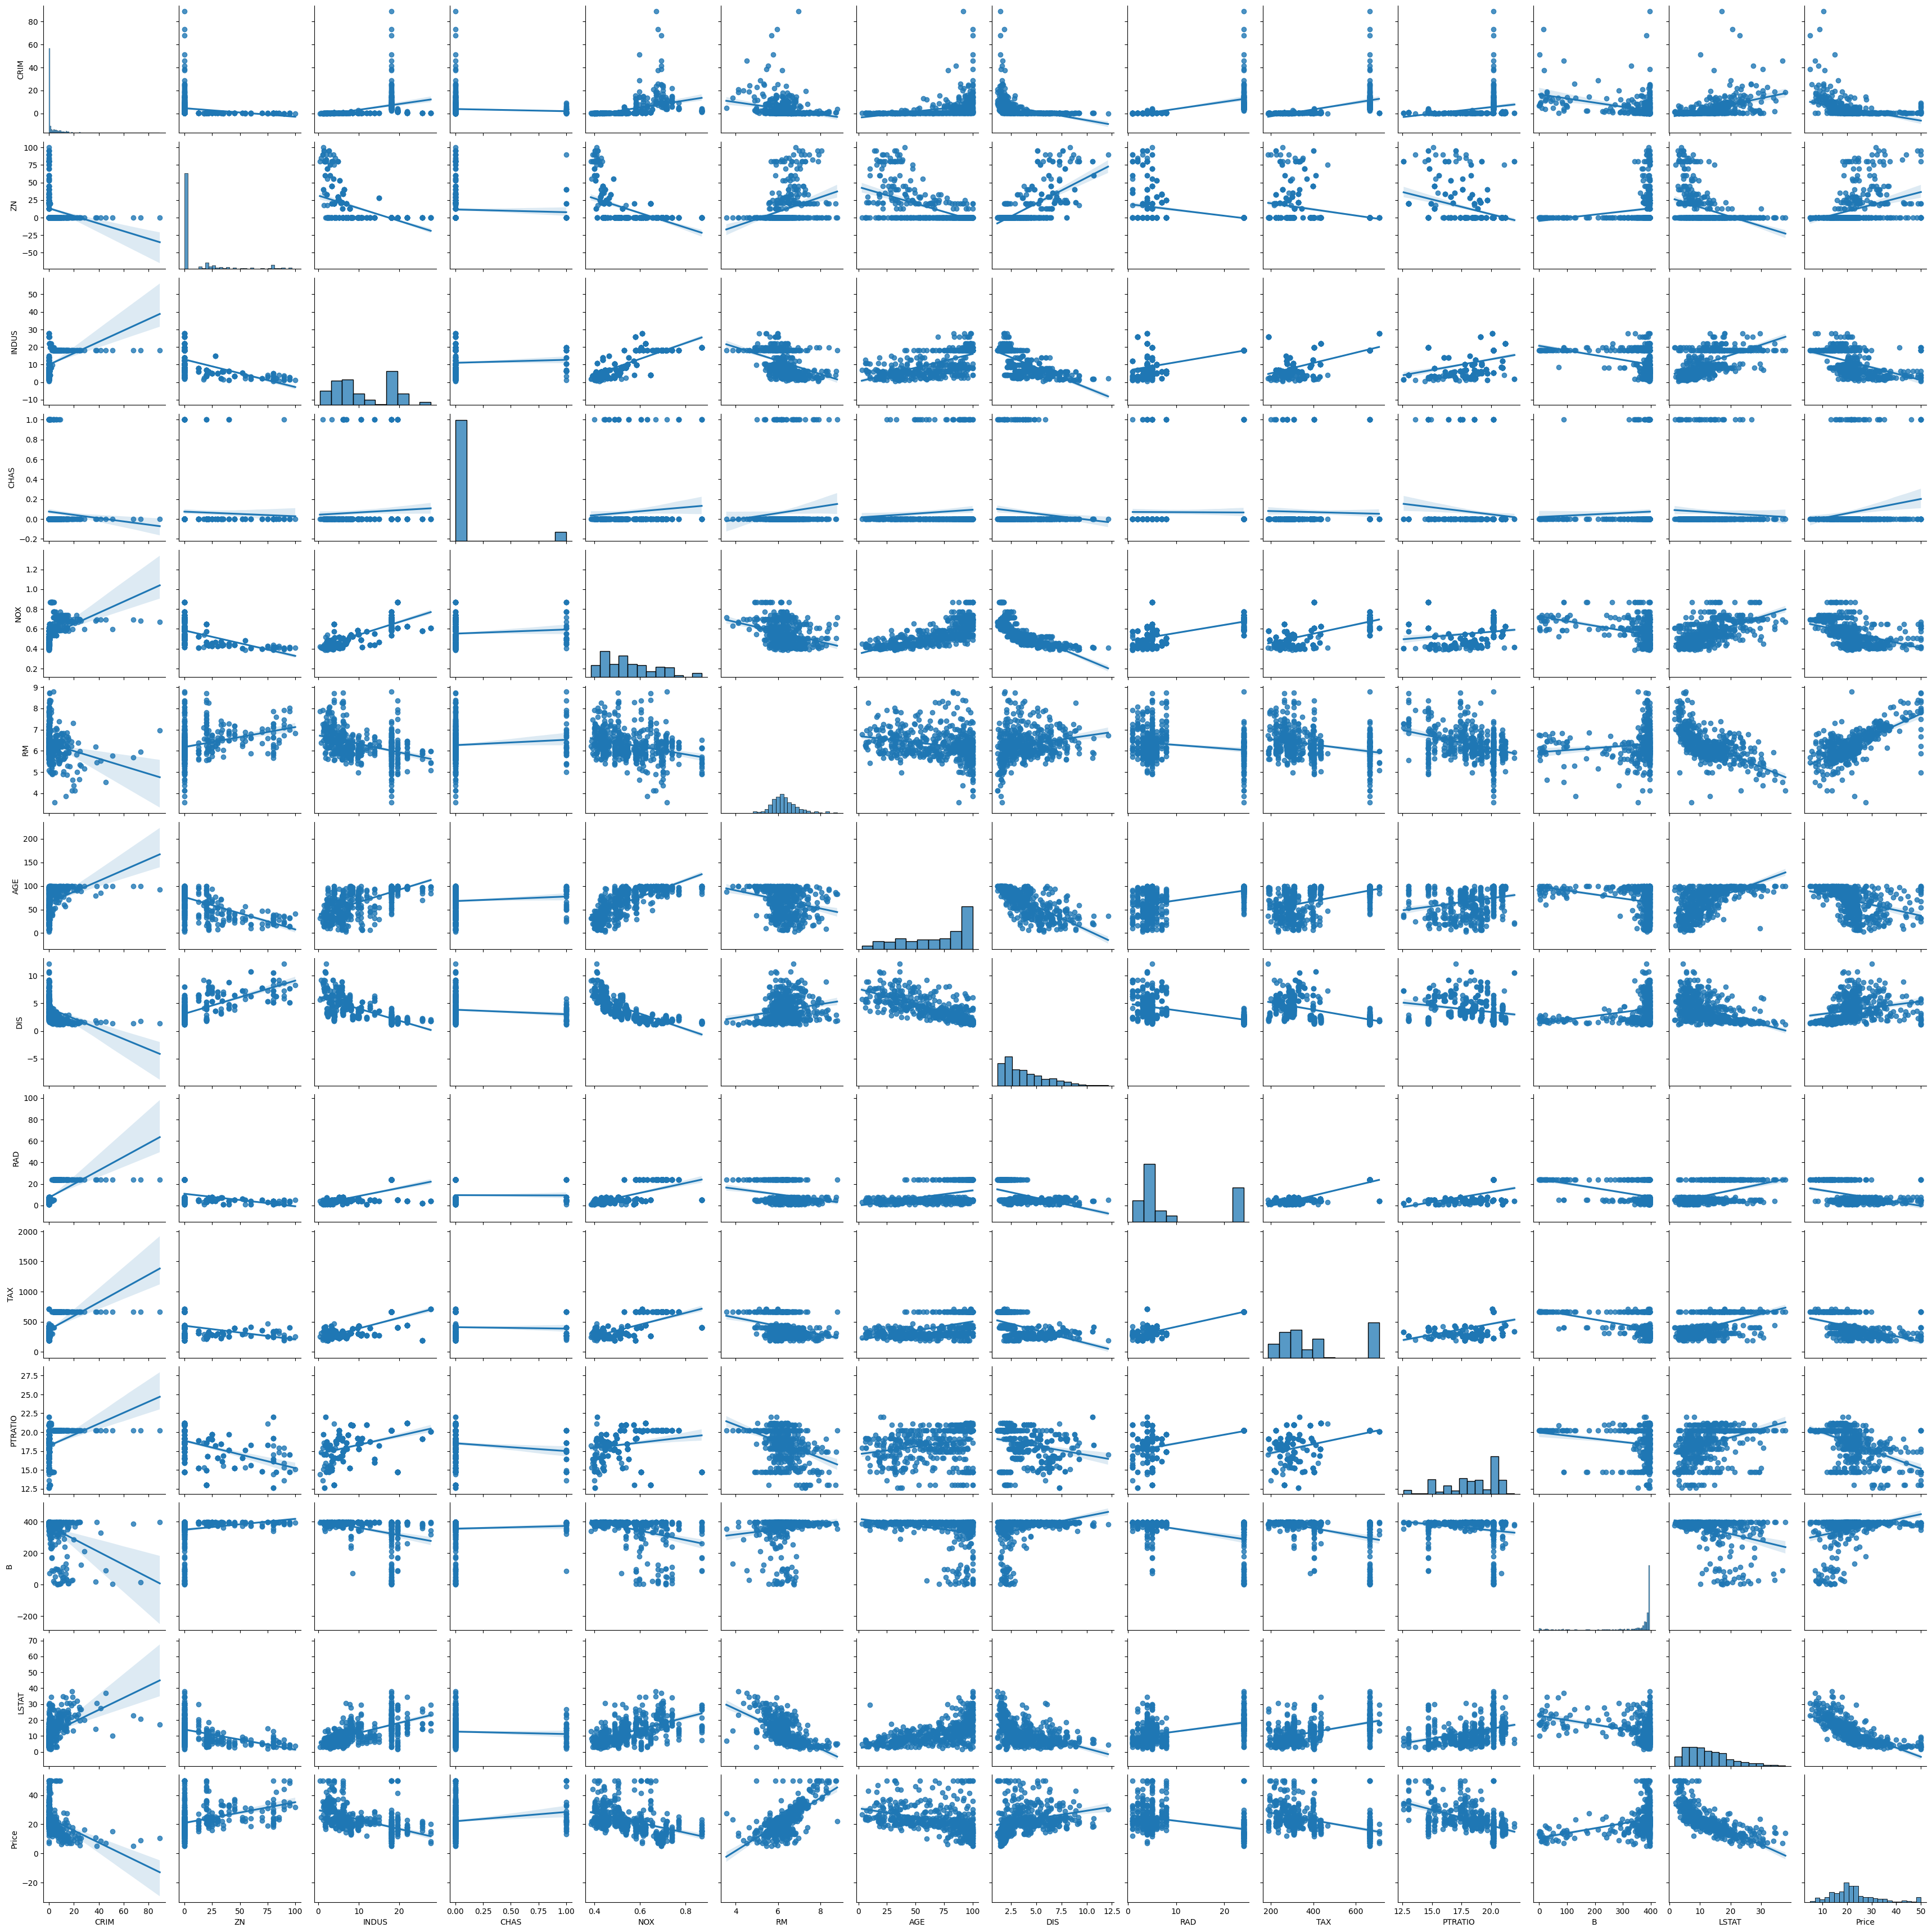

In [38]:
sns.pairplot(data=df,kind="reg")

In [39]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [40]:
df.shape

(506, 14)

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [42]:
df_cat=df.copy()

In [43]:
def get_age_category(x):
    if x < 50:
        return 'New'
    elif 50 <= x < 85:
        return 'Old'
    else:
        return 'Very_Old'

df_cat['AGE_category'] = df_cat.AGE.apply(get_age_category)

In [44]:
df_cat.groupby('AGE_category').size()

AGE_category
New         147
Old         149
Very_Old    210
dtype: int64

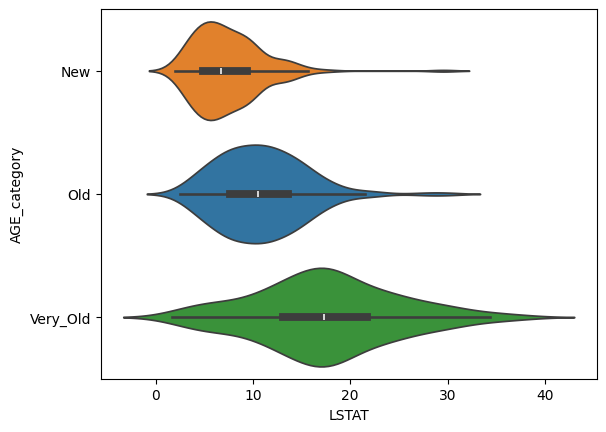

In [45]:
sns.violinplot(x='LSTAT', y='AGE_category', data=df_cat, order=['New', 'Old','Very_Old'],hue='AGE_category');

In [46]:
# define numeric and categorical columns
num_col = df.describe().columns.tolist()
all_col = df.columns.tolist()
obj_col = [i for i in all_col if i not in num_col]

/Users/lorenzo/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/lorenzo/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs

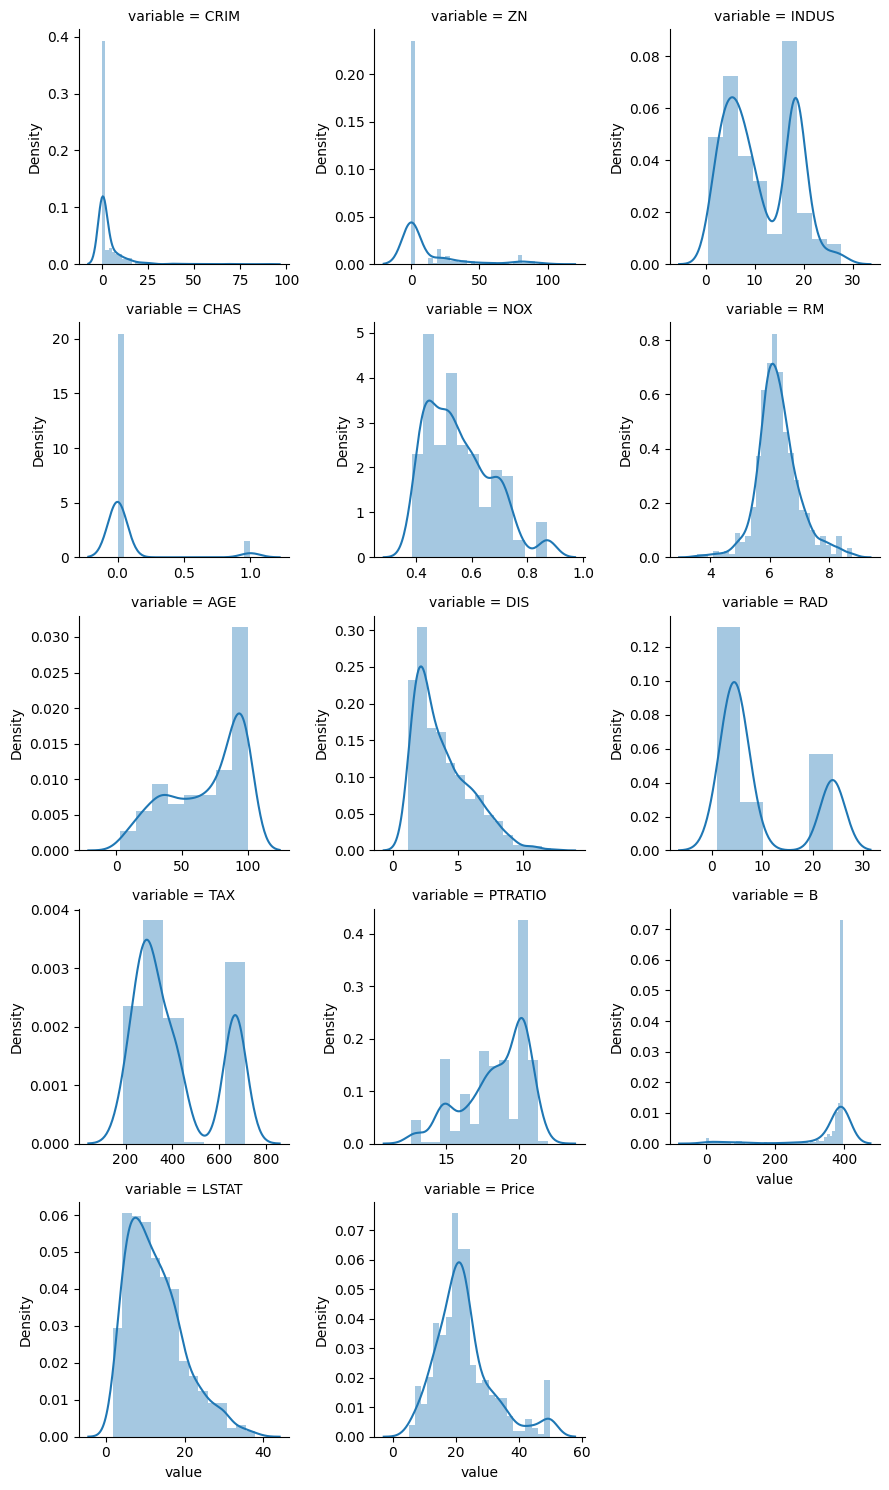

In [47]:
def viz(df,types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3,
                      sharex=False, sharey=False)
    g = g.map(types, "value")
    plt.show()
    return (g)
# histogram visualization
viz(df[num_col], sns.distplot)

## regressione lasso ridge

In [48]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
X = df.drop('Price',axis=1)
#X = df[['LSTAT','PTRATIO','RM']]
y = df['Price']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 667
                                                    )

In [127]:
polyfeats = PolynomialFeatures(degree=3)
X_train_poly = polyfeats.fit_transform(X_train)
X_test_poly = polyfeats.transform(X_test)

print("Numero di esempi nel test: "+str(X_train_poly.shape[0]))
print("Numero di features: "+str(X_train_poly.shape[1]))

Numero di esempi nel test: 354
Numero di features: 560


In [128]:
ss = StandardScaler()
X_train_poly = ss.fit_transform(X_train_poly)
X_test_poly = ss.transform(X_test_poly)

In [129]:
X_ = X.copy()
X_ = polyfeats.fit_transform(X_)
X_ = ss.transform(X_)

In [130]:
X_.shape

(506, 560)

In [131]:
def overfit_eval(model, X, y):

    """
    model: il nostro modello predittivo già addestrato
    X: una tupla contenente le prorietà del train set e test set (X_train, X_test)
    y: una tupla contenente target del train set e test set (y_train, y_test)
    """

    y_pred_train = model.predict(X[0])
    y_pred_test = model.predict(X[1])

    mse_train = mean_squared_error(y[0], y_pred_train)
    mse_test = mean_squared_error(y[1], y_pred_test)

    r2_train = r2_score(y[0], y_pred_train)
    r2_test = r2_score(y[1], y_pred_test)

    print("Train set:  MSE="+str(mse_train)+" R2="+str(r2_train))
    print("Test set:  MSE="+str(mse_test)+" R2="+str(r2_test))

In [132]:
from sklearn.linear_model import ElasticNet

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for alpha in alphas:
    print("Lambda is: "+str(alpha))
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic.fit(X_train_poly, y_train)
    overfit_eval(elastic, (X_train_poly, X_test_poly),(y_train, y_test))

Lambda is: 0.0001


/Users/lorenzo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.446e+02, tolerance: 2.923e+00
  model = cd_fast.enet_coordinate_descent(


Train set:  MSE=2.40584020812418 R2=0.9708636910429663
Test set:  MSE=13.453427573044928 R2=0.8483648615047854
Lambda is: 0.001


/Users/lorenzo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.893e+02, tolerance: 2.923e+00
  model = cd_fast.enet_coordinate_descent(


Train set:  MSE=2.566419837632956 R2=0.9689189660018873
Test set:  MSE=12.677910720065737 R2=0.8571058016680555
Lambda is: 0.01


/Users/lorenzo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.668e+02, tolerance: 2.923e+00
  model = cd_fast.enet_coordinate_descent(


Train set:  MSE=4.059502156228074 R2=0.9508367560587796
Test set:  MSE=14.624258445149389 R2=0.8351682913012377
Lambda is: 0.1
Train set:  MSE=8.35796465667937 R2=0.8987795450144008
Test set:  MSE=20.761531466970542 R2=0.7659943771002662
Lambda is: 1
Train set:  MSE=16.42795888407938 R2=0.8010466015308705
Test set:  MSE=32.34544808637978 R2=0.6354307128322478
Lambda is: 10
Train set:  MSE=63.07174223296046 R2=0.2361596742990868
Test set:  MSE=70.42623668924044 R2=0.20621773922757114


/Users/lorenzo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.256e+01, tolerance: 2.923e+00
  model = cd_fast.enet_coordinate_descent(


In [234]:
elasticnet = ElasticNet(alpha=0.055, l1_ratio=0.55)

In [235]:
elasticnet.fit(X_train_poly,y_train)

/Users/lorenzo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.838e+02, tolerance: 2.923e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.055, l1_ratio=0.55)

In [242]:
elasticnet.score(X_test_poly,y_test)

0.7906630086722111

In [243]:
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(elasticnet,X_,y,cv=5, scoring='r2')
cross_score

/Users/lorenzo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.977e+02, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
/Users/lorenzo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.925e+02, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
/Users/lorenzo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

array([0.72762285, 0.79544511, 0.7790543 , 0.41052956, 0.49016666])

In [244]:
cross_score.mean()

0.64056369520412

In [245]:
cross_score.mean() + elasticnet.score(X_test_poly,y_test)

1.431226703876331